In [ ]:
""" Raman Rabi Oscillations
    Preston Huft, May 2019    
"""

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import complex_ode,odeint
from scipy.integrate import solve_ivp
import sympy
from sympy import MatrixSymbol,MatAdd,MatMul,Identity,I,Matrix,symbols
from sympy.utilities.lambdify import lambdify, implemented_function
from sympy.utilities.iterables import flatten
import time
from math import pi,sqrt

Comp time = 0.008978605270385742[s]


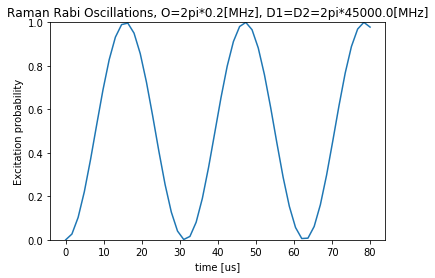

In [18]:
###############################################################################
## Two-photon Rabi oscillations for Rb87 Raman transition
###############################################################################

def cc(z): 
    return np.conj(z)

def derivs(y0,t,D1,D2,O1,O2):
    """ Returns RHS of optical bloch eqs for current values at time t"""
    cg,ce = y0
    
    # See Mark's notes, eqs 11.14. Intermediate level r eliminated.
    
    D = D1-D2 # resonant when the single-photon detunings cancel
    DD1 = D - cc(O1)*O1/(D1+D2)
    DD2 = D + cc(O2)*O2/(D1+D2)
    OR = O1*cc(O2)/(D1+D2)
    
    dcg = -1j*(DD1*cg-cc(OR)*ce)/2
    dce = 1j*(DD2*ce+OR*cg)/2
    
    return np.array([dcg,dce])


## initial conditions - system starts in ground state (|F=2,mF=0>)
c_g = 1 + 0j
c_e = 0 + 0j
y0 = np.array([c_g,c_e]) # bundle i.c.

## experiment parameters and pertinent quantities
P = 2*(3e-6) # [W] beam power per sideband at atoms
w0 = 6e-6 # [m] expected Gaussian beam waist at atoms

## test a single Rabi frequency
O = 0.200 # [MHz] 324623.79048954 # Two-photon Rabi f
D1 = 2*pi*4.5e4  # [MHz]
D2 = D1
O1 = sqrt((D1+D2)*O) # Single-photon Rabi f, for O1 = O2
O2 = O1

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim((0,1))
ax.set_title(f'Raman Rabi Oscillations, O=2pi*{O}[MHz],\
 D1=D2=2pi*{D1/(2*pi)}[MHz]')
ax.set_xlabel('time [us]')
ax.set_ylabel('Excitation probability')

## max pulse duration
t_exp = 80 # [us]  ~ pi/2 time we've been using

## Try with solve_ivp
stopwatch = time.time()
func = lambda time,y: derivs(y,time,D1,D2,O1,O2)
soln = solve_ivp(func,[0,t_exp],y0,t_eval=np.linspace(0,t_exp,50),
                method='RK45')
ctime = time.time()-stopwatch
print(f"Comp time = {ctime}[s]")
ypts = [abs(y)**2 for y in soln.y[1]]
ax.plot(soln.t,ypts)

# ax.legend(loc='upper right')
plt.show()